In [1]:
# ! pip install tpot --user

In [2]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Ramka danych i preproccesing wstępny
from sklearn.model_selection import train_test_split

seed = 17
bank_data = pd.read_csv("./Data/bank_train_data.csv", index_col=0)

## Kategoryczne niebinarne
# Oridinal education
bank_data['education'] = bank_data['education'].map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})

# OneHot reszty
bank_data = pd.get_dummies(bank_data, columns=['job','contact','marital','poutcome'])

## Kategoryczne binarne
binary = ["default", "housing", "loan", "y"]
for col in binary:
    bank_data[col] = bank_data[col].map({"yes": 1, "no": 0})

# Month (tranfosrmacja na okrąg)
bank_data['month'] = bank_data["month"].map({"jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11})
bank_data['month'] = bank_data["month"].apply(lambda x: np.sin(x * (2 * np.pi / 12)))

# Day (transformacja na okrąg)
bank_data['day'] = bank_data["day"].apply(lambda x: np.sin(x * (2 * np.pi / 31)))
X = bank_data.drop("y", axis=1)
y = bank_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y, test_size=0.2)

In [4]:
from sklearn.metrics import fbeta_score, confusion_matrix, roc_curve, auc, precision_score, accuracy_score, recall_score
from math import sqrt

def custom_fbeta_scorer(estimator, X, y):
    y_hat = estimator.predict(X)
    return fbeta_score(y, y_hat, beta=0.5)

def custom_gmean_scorer(estimator, X, y):
    y_hat = estimator.predict(X)
    conf = confusion_matrix(y, y_hat)
    gmean = sqrt((conf[1][1]/(conf[1][1] + conf[1][0])) * (conf[0][0]/(conf[0][0] + conf[0][1])))
    return gmean


def plot_roc_curve(model, title_model, X_test, y_test):
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" % roc_auc)
    plt.title("ROC for: " + str(title_model).split('(')[0])
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR")
    plt.xlabel("FPR")
    plt.show()
def base_test_model(model, X_test, y_test):
    y_hat = model.predict(X_test)
    
    precision = precision_score(y_test, y_hat)
    g_mean = custom_gmean_scorer(model, X_test, y_test)
    accuracy = accuracy_score(y_test, y_hat)
    fbeta = fbeta_score(y_test, y_hat, beta=0.5)
    recall = recall_score(y_test,y_hat)
    print("Precision score:", precision)
    print("G-mean score:   ", g_mean)
    print("Accuracy score: ", accuracy)
    print("Fbeta_score:    ", fbeta)
    print("Recall score:", recall)
    print("Confusion matrix: \n", confusion_matrix(y_test, y_hat))
    return precision, g_mean, accuracy, fbeta, recall

In [6]:
clf = tpot.TPOTClassifier(max_time_mins=60,
                          verbosity=2, 
                          random_state=17,
                          cv = 5, 
                          scoring = custom_gmean_scorer
                         )

In [7]:
clf.fit(X_train, y_train)

  File "C:\Users\barto\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6575848037797447

Generation 2 - Current best internal CV score: 0.7059260383466881

Generation 3 - Current best internal CV score: 0.7213574930780717

Generation 4 - Current best internal CV score: 0.7217376149655499

Generation 5 - Current best internal CV score: 0.7258428929442833

Generation 6 - Current best internal CV score: 0.7258428929442833

Generation 7 - Current best internal CV score: 0.7565708082580459

Generation 8 - Current best internal CV score: 0.7565708082580459

Generation 9 - Current best internal CV score: 0.7680741337260365

Generation 10 - Current best internal CV score: 0.7829973379988362

Generation 11 - Current best internal CV score: 0.790900857072169

Generation 12 - Current best internal CV score: 0.79098058389637

Generation 13 - Current best internal CV score: 0.7944093814144731

Generation 14 - Current best internal CV score: 0.8013458127167048

Generation 15 - Current best internal CV score: 0.806312083

TPOTClassifier(max_time_mins=60, random_state=17,
               scoring=<function custom_gmean_scorer at 0x000002BBE8D82CA0>,
               verbosity=2)

C:\Users\barto\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\barto\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\barto\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\barto\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\barto\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\barto\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWa

Precision score: 0.3333333333333333
G-mean score:    0.8084376466811949
Accuracy score:  0.7883096366508688
Fbeta_score:     0.37888198757763975
Recall score: 0.8356164383561644
Confusion matrix: 
 [[438 122]
 [ 12  61]]


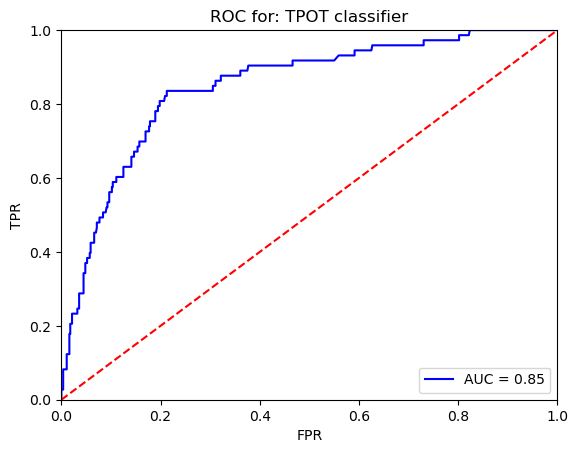

In [9]:
base_test_model(clf, X_test, y_test)
plot_roc_curve(clf, "TPOT classifier", X_test, y_test)

In [10]:
clf.pareto_front_fitted_pipelines_

{'GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=2, GradientBoostingClassifier__max_features=0.4, GradientBoostingClassifier__min_samples_leaf=2, GradientBoostingClassifier__min_samples_split=9, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001)': Pipeline(steps=[('gradientboostingclassifier',
                  GradientBoostingClassifier(learning_rate=1.0, max_depth=2,
                                             max_features=0.4,
                                             min_samples_leaf=2,
                                             min_samples_split=9,
                                             random_state=17,
                                             subsample=0.8500000000000001))]),
 'BernoulliNB(PCA(input_matrix, PCA__iterated_power=9, PCA__svd_solver=randomized), BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=False)': Pipeline(steps=[('pca